In [9]:
from torchvision.datasets import ImageFolder
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import cv2
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import koreanize_matplotlib

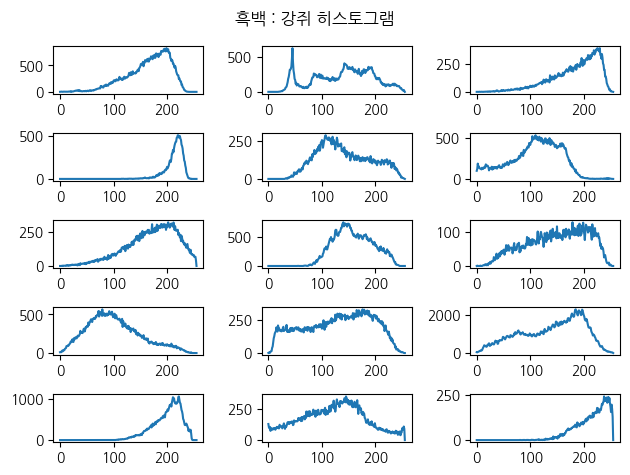

In [10]:
img_num=[0,5,7,9,12,16,19,20,21,23,24,25,26,27,33] # 15개  
for i,v in enumerate(img_num):
    img = cv2.imread(f"./data/mop_dog/{v}.jpg", cv2.IMREAD_GRAYSCALE)
    hist = cv2.calcHist([img], [0], None, [256], [0,255])
    plt.subplot(5,3,i+1)
    plt.plot(hist)

plt.suptitle("흑백 : 강쥐 히스토그램")
plt.tight_layout()
plt.show()

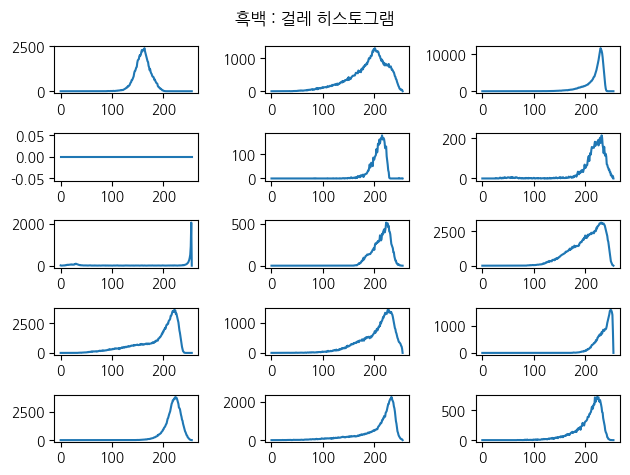

In [12]:
img_num=[1,9,10,17,22,23,24,26,27,28,29,30,38,39,40] # 15개  
for i,v in enumerate(img_num):
    img = cv2.imread(f"./data/mop/{v}.jpg", cv2.IMREAD_GRAYSCALE)
    hist = cv2.calcHist([img], [0], None, [256], [0,255])
    plt.subplot(5,3,i+1)
    plt.plot(hist)
plt.suptitle("흑백 : 걸레 히스토그램")
plt.tight_layout()
plt.show()

In [ ]:
# 흑백으로 보니, 강아지 사진이 색깔 차이가 더 크다! 

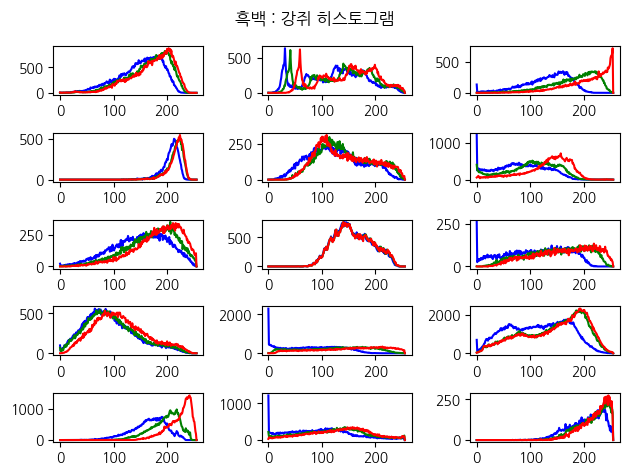

In [15]:
img_num=[0,5,7,9,12,16,19,20,21,23,24,25,26,27,33] # 15개  
for i,v in enumerate(img_num):
    img = cv2.imread(f"./data/mop_dog/{v}.jpg")
    plt.subplot(5,3,i+1)
    channels = cv2.split(img)
    colors = ('b', 'g', 'r')
    for (ch, color) in zip (channels, colors):
        hist = cv2.calcHist([ch], [0], None, [256], [0, 255])
        plt.plot(hist, color = color)


plt.suptitle("컬러 : 강쥐 히스토그램")
plt.tight_layout()
plt.show()

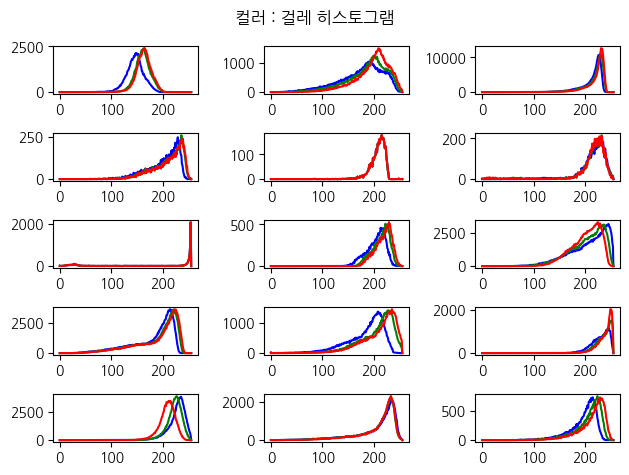

In [18]:
img_num=[1,9,10,105,22,23,24,26,27,28,29,30,38,39,40] # 15개  
for i,v in enumerate(img_num):
    img = cv2.imread(f"./data/mop/{v}.jpg")
    plt.subplot(5,3,i+1)
    channels = cv2.split(img)
    colors = ('b', 'g', 'r')
    for (ch, color) in zip (channels, colors):
        hist = cv2.calcHist([ch], [0], None, [256], [0, 255])
        plt.plot(hist, color = color)


plt.suptitle("컬러 : 걸레 히스토그램")
plt.tight_layout()
plt.show()

In [ ]:
# 컬러로 보니, 색깔 분포가 강아지가 더 넓다!
# 아마 외부생활로 인한 털 색깔의 불균형함을 하나로 뽑음 => 오츠의 알고리즘으로 이진화를 하면 더 잘 분류될 것 같다.

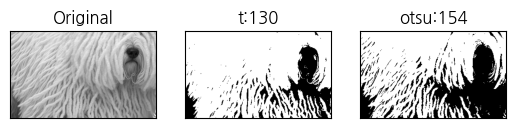

In [23]:
def OTSU(filename):
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE) 
    _, t_130 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)        
    t, t_otsu = cv2.threshold(img, -1, 255,  cv2.THRESH_BINARY | cv2.THRESH_OTSU) 
    imgs = {'Original': img, 't:130':t_130, 'otsu:%d'%t: t_otsu}
    for i , (key, value) in enumerate(imgs.items()):
        plt.subplot(1, 3, i+1)
        plt.title(key)
        plt.imshow(value, cmap='gray')
        plt.xticks([]); plt.yticks([])
    plt.show()

OTSU('./data/mop_dog/0.jpg')

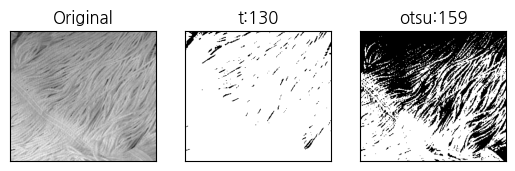

In [24]:
OTSU('./data/mop/1.jpg')

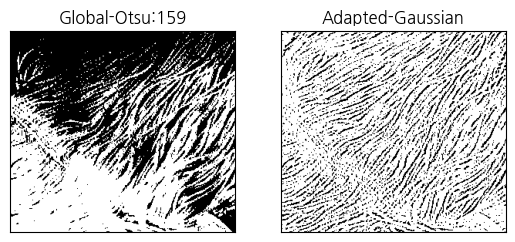

In [27]:
# 적응형 스래시홀드로 계산
def AG(filename) : 
    blk_size = 9        # 블럭 사이즈
    C = 5               # 차감 상수 
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE) # 그레이 스케일로  읽기

    ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                        cv2.THRESH_BINARY, blk_size, C)
    imgs = {'Global-Otsu:%d'%ret:th1,\
            'Adapted-Gaussian': th3}
    for i, (k, v) in enumerate(imgs.items()):
        plt.subplot(1,2,i+1)
        plt.title(k)
        plt.imshow(v,'gray')
        plt.xticks([]),plt.yticks([])

    plt.show()
# Adapted-Gaussian으로 더욱 정밀한 질감을 나타낸다! 
AG('./data/mop/1.jpg')

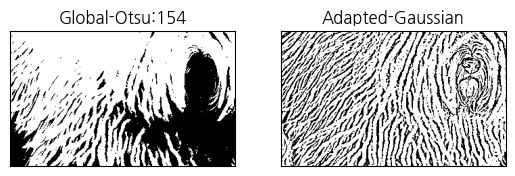

In [28]:
AG('./data/mop_dog/0.jpg')

In [ ]:
# 근데...이거 질감 차이 나는 게 맞나?? 일단 해보자 